## Introduction

The main objective here is to extract key performance indicators (KPIs) that will help to make data-driven decisions and improve company business. The data used in this case is Sales Data of Electronic Products in the USA.

## Question to Answer

1. What is the total number of sales?
2. What is the average sales per month?
3. What was the best month for sales? How much was earned that month?
4. What City had the highest number of sales?
5. What product sold the most? Why it sold the most?
6. What products are most often sold together?
7. What time should we display adverstisement to maximize likelihood of customer's buying product?

In [34]:
import numpy as np
import pandas as pd
import os

# for VIZ
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the files

files = os.listdir('/content/drive/MyDrive/Workshop on Data Visualization with Python/Sales_Data')
files

['Sales_February_2019.csv',
 'Sales_April_2019.csv',
 'Sales_January_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_July_2019.csv',
 'Sales_September_2019.csv',
 'Sales_October_2019.csv',
 'Sales_November_2019.csv',
 'Sales_May_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv']

In [36]:
# Read the files

df = pd.DataFrame()

for i in files:
  data = pd.read_csv(os.path.join('/content/drive/MyDrive/Workshop on Data Visualization with Python/Sales_Data', i))
  df = pd.concat([df, data])

In [37]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [38]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [39]:
# Getting some basic some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Cleaning Data

In [40]:
# check the Null Values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [41]:
# Droping Null Values
df.dropna(inplace= True)

In [42]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


### Changing Data Type

In [43]:
# Getting Unique value for each category

df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address']].describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [44]:
df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', '5', '7', 'Quantity Ordered', '6', '8', '9'],
      dtype=object)

In [45]:
# Create the filter to drop the text value from Quantity Ordered
filter_text = df['Quantity Ordered'] != 'Quantity Ordered'

df = df[filter_text]

In [46]:
df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', '5', '7', '6', '8', '9'], dtype=object)

In [47]:
df['Price Each'].unique()

array(['700', '3.84', '389.99', '14.95', '150', '11.95', '99.99',
       '149.99', '11.99', '1700', '300', '109.99', '600.0', '2.99',
       '999.99', '379.99', '600', '400', '700.0', '1700.0', '150.0',
       '300.0', '400.0'], dtype=object)

In [48]:
# Convert the Quantity Ordered and Price Each Data Type

df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
df['Price Each'] = df['Price Each'].astype('float')

In [49]:
# Convert the Order Data Datatype
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [50]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Adding Month, Hour, Minute, Revenue and City Column from Existing Column

In [51]:
# Create the Year, Month, Hour, Minute Column

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [52]:
# Create the Revenue Column

df['Revenue'] = df['Price Each'] * df['Quantity Ordered']

In [53]:
m = 'India, vs, Srilanka'
m.split(',')[1]

' vs'

In [54]:
# Create the new City Column from Purchase Address

city = []

for i in df['Purchase Address']:
  c = i.split(',')[1]
  city.append(c)

df['City'] = city

In [55]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2019,2,1,35,700.00,Portland
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2019,2,7,24,3.84,San Francisco
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2019,2,9,46,389.99,New York City
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2019,2,16,47,14.95,Atlanta
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2019,2,20,32,7.68,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",2019,3,11,14,14.95,San Francisco
15222,176555,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",2019,3,20,27,149.99,San Francisco
15223,176556,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",2019,3,10,29,8.97,Los Angeles
15224,176557,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",2019,3,12,32,700.00,San Francisco


In [56]:
# Check a Number of Unique Values for each column

n = df.nunique(axis = 0)
print("Number of Unique Values in each column :\n", n)

Number of Unique Values in each column :
 Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Year                     2
Month                   12
Hour                    24
Minute                  60
Revenue                 54
City                     9
dtype: int64


In [57]:
df['Year'].value_counts()

2019    185916
2020        34
Name: Year, dtype: int64

In [58]:
df = df[df.Year != 2020]

In [59]:
# Check a Number of Unique Values for each column

n = df.nunique(axis = 0)
print("Number of Unique Values in each column :\n", n)

Number of Unique Values in each column :
 Order ID            178406
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142366
Purchase Address    140768
Year                     1
Month                   12
Hour                    24
Minute                  60
Revenue                 54
City                     9
dtype: int64


In [60]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2019,2,1,35,700.00,Portland
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2019,2,7,24,3.84,San Francisco
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2019,2,9,46,389.99,New York City
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2019,2,16,47,14.95,Atlanta
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2019,2,20,32,7.68,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",2019,3,11,14,14.95,San Francisco
15222,176555,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",2019,3,20,27,149.99,San Francisco
15223,176556,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",2019,3,10,29,8.97,Los Angeles
15224,176557,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",2019,3,12,32,700.00,San Francisco


# **Exploratory Data Analysis**

## Some Basic Analysis

In [61]:
product_sales = df.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean', 'Revenue': 'sum'})
product_sales

,Quantity Ordered,Price Each,Revenue
Product,,,
20in Monitor,4126.0,109.99,453818.74
27in 4K Gaming Monitor,6243.0,389.99,2434707.57
27in FHD Monitor,7547.0,149.99,1131974.53
34in Ultrawide Monitor,6199.0,379.99,2355558.01
AA Batteries (4-pack),27635.0,3.84,106118.40
AAA Batteries (4-pack),31012.0,2.99,92725.88
Apple Airpods Headphones,15657.0,150.00,2348550.00
Bose SoundSport Headphones,13454.0,99.99,1345265.46
Flatscreen TV,4818.0,300.00,1445400.00


<Axes: title={'center': 'Sales Data Correlation'}>

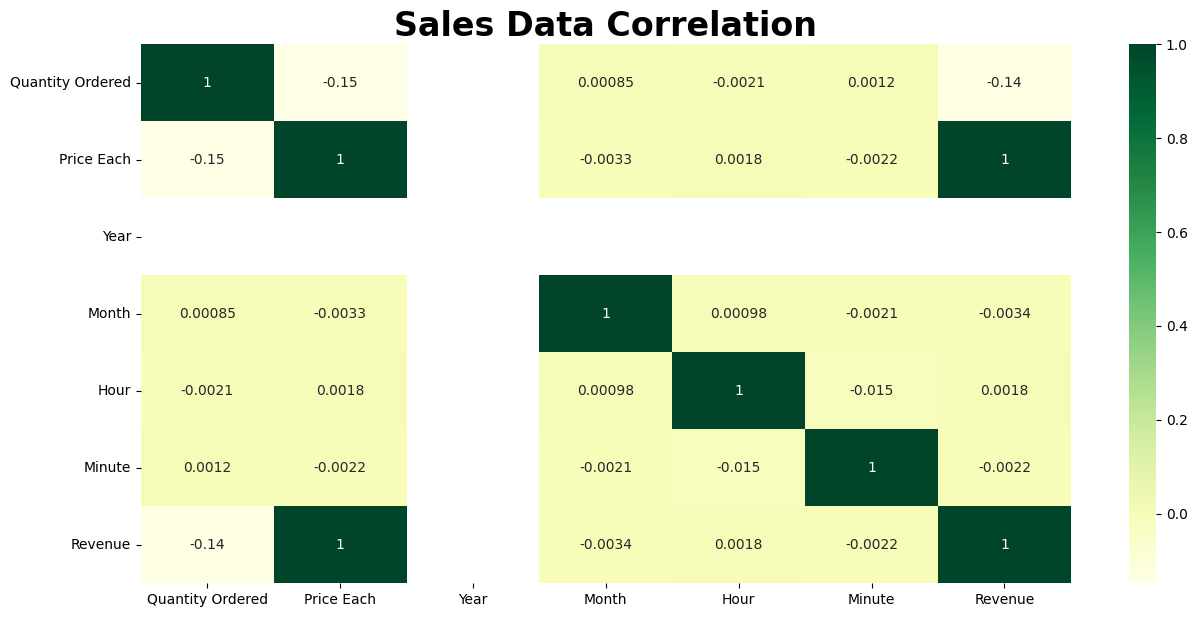

In [62]:
# Plot the Heatmap of Correlation Matrix to understand the relationship between different columns

plt.figure(figsize = (15, 7))
plt.title("Sales Data Correlation", weight = 'bold', fontsize = 24)

cor = df.corr()
sns.heatmap(cor, annot = True, cmap = 'YlGn')

## Q1. What is the total number of sales?

In [63]:
year_sales = df.groupby("Year").agg({'Revenue': 'sum'})
year_sales

,Revenue
Year,
2019,34483365.68


*The total sales in the year 2019 were **$34483365.68** by selling **209038** products.*

## Q2. What is the average sales per month?

In [32]:
avg_month_sales = df.groupby('Month').agg({'Revenue': 'mean'}).sort_values(by='Revenue', ascending = False)
avg_month_sales

,Revenue
Month,
5,190.305852
6,190.187565
8,187.648849
1,187.450795
4,185.495390
3,185.250471
7,185.249826
12,184.655913
10,184.238580


In [33]:
px.bar(data_frame=avg_month_sales, x = avg_month_sales.index, y = avg_month_sales.Revenue, title='Average Sales for Each Month')

*In 2019, **May** has the highest average revenue with **USD 190.3095** whereas **September** has the lowest average Revenue with **USD 180.4974**.*

## Q3. What was the best month for sales? How much was earned that month?

In [ ]:
total_month_sales = df.groupby('Month').agg({'Revenue': 'sum'})
total_month_sales

,Revenue
Month,
1,1813586.44
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [ ]:
px.bar(data_frame=total_month_sales, x = total_month_sales.index, y = total_month_sales.Revenue, title='Total Sales for Each Month')

*From the above graoh we can tell that **December** is the best month for sales with **USD 4.6134M** total revenue.*

## Q4. What City had the highest number of sales?

In [ ]:
city_sales = df.groupby('City').agg({'Quantity Ordered': 'sum', 'Revenue': 'sum'})
city_sales

,Quantity Ordered,Revenue
City,,
Atlanta,16602.0,2795498.58
Austin,11151.0,1819081.77
Boston,22524.0,3660315.12
Dallas,16728.0,2766260.45
Los Angeles,33288.0,5451570.81
New York City,27916.0,4662976.81
Portland,14051.0,2320337.62
San Francisco,50226.0,8259719.03
Seattle,16552.0,2747605.49


In [ ]:
px.bar(data_frame=city_sales, x = city_sales.index, y = city_sales.Revenue, title='Total Sales from Each City')

*San Francisco had the highest total sales in 2019 with $8.2597M*

## Q5. What product sold the most? Why it sold the most?

In [ ]:
product_sales = df.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean', 'Revenue': 'sum'}).sort_values(by='Revenue', ascending = False)
product_sales

,Quantity Ordered,Price Each,Revenue
Product,,,
Macbook Pro Laptop,4727.0,1700.00,8035900.00
iPhone,6847.0,700.00,4792900.00
ThinkPad Laptop,4128.0,999.99,4127958.72
Google Phone,5531.0,600.00,3318600.00
27in 4K Gaming Monitor,6243.0,389.99,2434707.57
34in Ultrawide Monitor,6199.0,379.99,2355558.01
Apple Airpods Headphones,15657.0,150.00,2348550.00
Flatscreen TV,4818.0,300.00,1445400.00
Bose SoundSport Headphones,13454.0,99.99,1345265.46


In [ ]:
product_sales.columns = [x.replace(' ', '_') for x in product_sales.columns]
product_sales.columns

Index(['Quantity_Ordered', 'Price_Each', 'Revenue'], dtype='object')

In [ ]:
px.bar(data_frame=product_sales, x = product_sales.index, y = product_sales.Quantity_Ordered, color = 'Revenue', title='Anayzing Product Sales Based on Quantity Ordered & their Revenue')

*From the graph above we can tell that The most sold product was **AAA Batteries (4-pack) (31.012k)**. We also can tell that AA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cable, and Wired Headphones sold more than other products. These products probably sold the most because it is an item that is needed often and is relatively cheap.*

## Q6. What products are most often sold together?

In [ ]:
# Import libraries to count combination of products
from itertools import combinations
from collections import Counter

In [ ]:
# Dropping duplicate values of 'Order ID' using duplicated() function
data = df.loc[df['Order ID'].duplicated(keep = False)]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City
16,150518,Macbook Pro Laptop,1.0,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2019,2,12,38,1700.00,San Francisco
17,150518,iPhone,1.0,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2019,2,12,38,700.00,San Francisco
82,150582,iPhone,1.0,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2019,2,23,38,700.00,Seattle
83,150582,Lightning Charging Cable,1.0,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2019,2,23,38,14.95,Seattle
91,150590,Apple Airpods Headphones,1.0,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2019,2,9,35,150.00,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...
15153,176487,Lightning Charging Cable,1.0,14.95,2019-03-14 14:46:00,"92 Johnson St, Los Angeles, CA 90001",2019,3,14,46,14.95,Los Angeles
15203,176537,Apple Airpods Headphones,1.0,150.00,2019-03-12 07:33:00,"80 Church St, Austin, TX 73301",2019,3,7,33,150.00,Austin
15204,176537,Apple Airpods Headphones,1.0,150.00,2019-03-12 07:33:00,"80 Church St, Austin, TX 73301",2019,3,7,33,150.00,Austin
15224,176557,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",2019,3,12,32,700.00,San Francisco


In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Year', 'Month', 'Hour', 'Minute', 'Revenue',
       'City'],
      dtype='object')

In [ ]:
# Joining product ordered with the same 'Order ID' in the new column called 'Grouped'
data['Grouped'] = data.groupby(['Order ID'])['Product'].transform(lambda x: ' ,'.join(x))

In [ ]:
# Creating a new variable for Counter
count = Counter()

# Creating a loop to count all the 2 product bundles
for i in data['Grouped']:
  r = i.split(',')
  count.update(Counter(combinations(r, 2)))

# Creating another loop to display the 10 most often products that sold together.
for k, v in count.most_common(20):
  print(k, v)

('iPhone ', 'Lightning Charging Cable') 1774
('Google Phone ', 'USB-C Charging Cable') 1722
('iPhone ', 'Wired Headphones') 971
('Google Phone ', 'Wired Headphones') 916
('iPhone ', 'Apple Airpods Headphones') 699
('Vareebadd Phone ', 'USB-C Charging Cable') 624
('USB-C Charging Cable ', 'Wired Headphones') 428
('Google Phone ', 'Bose SoundSport Headphones') 415
('Google Phone ', 'USB-C Charging Cable ') 394
('iPhone ', 'Lightning Charging Cable ') 364
('Vareebadd Phone ', 'Wired Headphones') 318
('Lightning Charging Cable ', 'Wired Headphones') 240
('Lightning Charging Cable ', 'Apple Airpods Headphones') 197
('USB-C Charging Cable ', 'Bose SoundSport Headphones') 187
('Apple Airpods Headphones ', 'Wired Headphones') 165
('Vareebadd Phone ', 'Bose SoundSport Headphones') 162
('Vareebadd Phone ', 'USB-C Charging Cable ') 149
('Bose SoundSport Headphones ', 'Wired Headphones') 140
('Lightning Charging Cable ', 'USB-C Charging Cable') 120
('Lightning Charging Cable ', 'AA Batteries (4-pa

*We can see the most often products that sold together are **iPhone** and **Lightning Charging Cable** with 1774 transactions. **Google Phone** and **USB-C Charging Cable** came second with 1722 transactions.*

With this information we could offer a smart deal bundle to the customer that buys iPhone, we could recommend the Lightning Charging Cable with a discount. We also can bundle the remaining products with good marketing strategies.

## Q7 What time should we display adverstisement to maximize likelihood of customer's buying product?

In [ ]:
hourly_sales = df.groupby('Hour').agg({'Quantity Ordered': 'sum', 'Revenue': 'sum'})
hourly_sales

,Quantity Ordered,Revenue
Hour,,
0,4412.0,711060.59
1,2610.0,458561.97
2,1394.0,232586.50
3,922.0,144697.99
4,933.0,162396.09
5,1491.0,230564.88
6,2810.0,448113.00
7,4556.0,744854.12
8,7002.0,1192348.97


In [ ]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=hourly_sales.index, y=hourly_sales['Revenue'])])
fig.show()

We can see that there are 2 peak hours in the data. They are **12 (12 PM)** and **19 (7 PM)**.
This makes sense since most people got some spare time for shopping during these hours. With this information, I recommend advertising the product at 9—11 AM and 4—6 PM.



## **Conclusion**

- The total sales in 2019 were USD 34.483.365 with 209.038 products sold.
- May has the highest average revenue with USD 190.305852, while September has the lowest average revenue with USD 180.497387.
- December is the best month for sales with USD 4.613.443 total revenue.
- San Francisco had the highest total sales in 2019 with USD 8.259.719 total revenue.
- AAA Batteries (4-pack) are the most sold product with 31.012 products ordered.
- iPhone and Lightning Charging Cable are the most often products sold together with 1004 transactions, Google Phone and USB-C Charging Cable came second with 987 transactions.
- I recommend advertising the product before 12 PM and 7 PM, which could be at 9—11 AM and 4—6 PM.